In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [40]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
x=df.drop(['Outcome'],axis=1,errors='ignore').values
y=df['Outcome'].values

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [45]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [46]:
import pickle
with open('scaler.pkl','wb')as f:
  pickle.dump(scaler,f)

In [47]:
model=Sequential([
    Dense(100,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(85,activation='relu'),
    Dense(80,activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
history=model.fit(x_train,y_train,epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7003 - loss: 0.6043
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7524 - loss: 0.5033
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7818 - loss: 0.4571
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7964 - loss: 0.4342
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7948 - loss: 0.4285
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7997 - loss: 0.4186
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8094 - loss: 0.4115 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7915 - loss: 0.4089 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8225 - loss: 0.3970
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8241 - loss: 0.3944 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8143 - loss: 0.3850
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accura

In [50]:
model.evaluate(x_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7403 - loss: 1.7770  


[1.777045488357544, 0.7402597665786743]

In [51]:
model.save('model.h5')

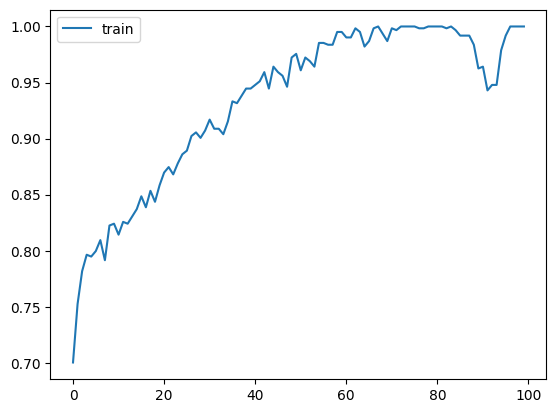

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.legend()
plt.show()

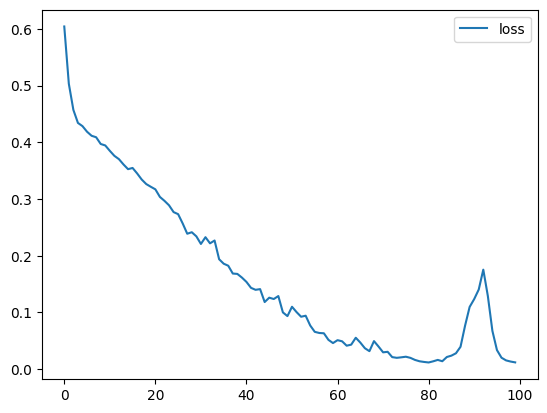

In [53]:
plt.plot(history.history['loss'],label='loss')
plt.legend()                                                                                             
plt.show()


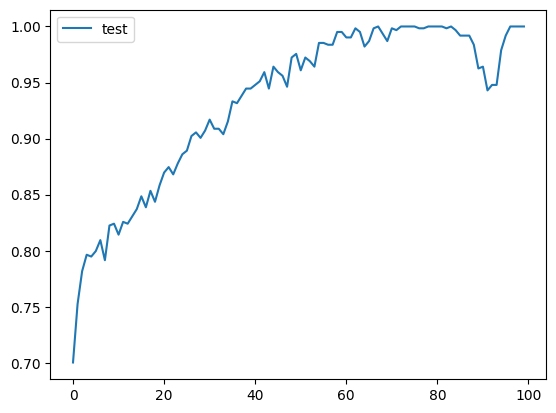

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='test')
plt.legend()
plt.show()

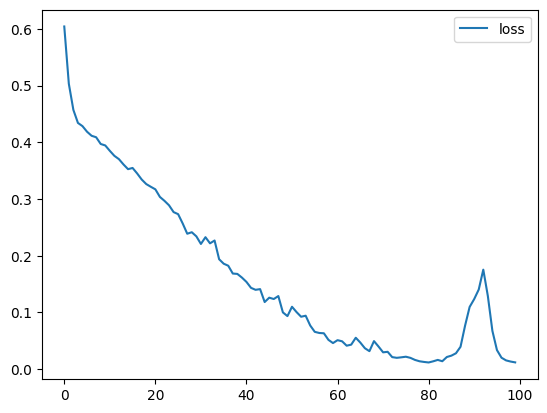

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()

In [56]:
yp=model.predict(x_test)
yp[:5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[3.7837336e-03],
       [4.0609688e-02],
       [9.9999964e-01],
       [8.4122585e-04],
       [5.5556367e-08]], dtype=float32)

In [57]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)

In [58]:
y_pred[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [59]:
y_test[:5]

array([1, 0, 1, 0, 0])

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred_binary = (yp > 0.5).astype(int)
print(classification_report(y_test,y_pred_binary))
print(confusion_matrix(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.57      0.57      0.57        46

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154

[[88 20]
 [20 26]]


In [61]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.55      0.57      0.56        46

    accuracy                           0.73       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.74      0.73      0.73       154

[[87 21]
 [20 26]]


In [62]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_test,y_test)
y_pred=dc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        46

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

[[108   0]
 [  0  46]]


In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       108
           1       0.63      0.52      0.57        46

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154

[[94 14]
 [22 24]]


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1)
rf.fit(x_test,y_test)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       108
           1       0.84      0.80      0.82        46

    accuracy                           0.90       154
   macro avg       0.88      0.87      0.87       154
weighted avg       0.90      0.90      0.90       154

[[101   7]
 [  9  37]]


In [66]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       108
           1       0.62      0.46      0.53        46

    accuracy                           0.75       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.74      0.75      0.74       154

[[95 13]
 [25 21]]


In [67]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       108
           1       0.62      0.46      0.53        46

    accuracy                           0.75       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.74      0.75      0.74       154

[[95 13]
 [25 21]]


In [68]:
from sklearn.model_selection import RandomizedSearchCV
rf_param={
    'n_estimators':[100,400,700,1000],
    'max_features':['sqrt','log2'],
    'max_depth':[10,30,50,70,90,110],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10]
}

In [69]:
rf_mod=RandomForestClassifier()
rf_cv=RandomizedSearchCV(estimator=rf,param_distributions=rf_param,cv=3,verbose=2,n_jobs=-1)
rf_cv.fit(x_train,y_train)
y_pred=rf_cv.predict(x_test)
rf_cv.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70}

In [ ]:
rf_mod=RandomForestClassifier()
rf_cv=RandomizedSearchCV(estimator=rf,param_distributions=rf_param,cv=3,verbose=2,n_jobs=-1)
rf_cv.fit(x_test,y_test)
y_pred=rf_cv.predict(x_test)
rf_cv.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [70]:
rf2=RandomForestClassifier(n_estimators=1000,
 min_samples_split=2,
 min_samples_leaf=4,
 max_features='sqrt',
 max_depth=50)
rf2.fit(x_train,y_train)
y_pred=rf2.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       108
           1       0.67      0.52      0.59        46

    accuracy                           0.78       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.77      0.78      0.77       154

[[96 12]
 [22 24]]


In [71]:
rf2=RandomForestClassifier(n_estimators=700,
 min_samples_split=5,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth=10)
rf2.fit(x_test,y_test)
y_pred=rf2.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.91      0.95        46

    accuracy                           0.97       154
   macro avg       0.98      0.96      0.97       154
weighted avg       0.97      0.97      0.97       154

[[108   0]
 [  4  42]]
